In [42]:
# uncomment if needed
# %pip install scikit-learn
# %pip install transformers
# %pip install matplotlib
# %pip install seaborn
# %pip install PySastrawi
# %pip install keras

In [43]:
import pandas as pd
import re

In [44]:
df = pd.read_json('main.json')
df.head()

,title,label,label_score
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",non-clickbait,0
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,non-clickbait,0
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,clickbait,1
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",non-clickbait,0
4,"Terkait Mayat Bayi Mengenaskan di Tangerang, S...",non-clickbait,0


In [45]:
df['label'].value_counts()

label
non-clickbait    8710
clickbait        6290
Name: count, dtype: int64

<Axes: ylabel='count'>

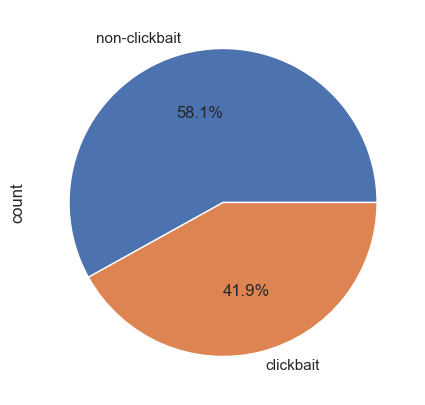

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

# pie plot with sns
plt.figure(figsize=(5, 5))
sns.set_theme()
df['label'].value_counts().plot.pie(autopct='%1.1f%%')

In [47]:
""" df_clickbait = df[df['label'] == 'clickbait']
df_non_clickbait = df[df['label'] == 'non-clickbait']

# Undersample the majority class
undersampled_non_clickbait = df_non_clickbait.sample(n=len(df_clickbait), random_state=3006)

# Combine the undersampled majority class with the minority class
balanced_df = pd.concat([undersampled_non_clickbait, df_clickbait], ignore_index=True)

# Check the class balance
balanced_df['label'].value_counts() """

" df_clickbait = df[df['label'] == 'clickbait']\ndf_non_clickbait = df[df['label'] == 'non-clickbait']\n\n# Undersample the majority class\nundersampled_non_clickbait = df_non_clickbait.sample(n=len(df_clickbait), random_state=3006)\n\n# Combine the undersampled majority class with the minority class\nbalanced_df = pd.concat([undersampled_non_clickbait, df_clickbait], ignore_index=True)\n\n# Check the class balance\nbalanced_df['label'].value_counts() "

In [48]:
import pandas as pd
from sklearn.utils import resample

# Separate the minority and majority classes
df_clickbait = df[df['label'] == 'clickbait']
df_non_clickbait = df[df['label'] == 'non-clickbait']

# Oversample the minority class
oversampled_clickbait = resample(df_clickbait, 
                                 replace=True,    # Sample with replacement
                                 n_samples=len(df_non_clickbait), # Match the number of non-clickbait samples
                                 random_state=3006) # For reproducibility

# Combine the oversampled minority class with the majority class
balanced_df = pd.concat([df_non_clickbait, oversampled_clickbait], ignore_index=True)

# Check the class balance
print(balanced_df['label'].value_counts())


label
non-clickbait    8710
clickbait        8710
Name: count, dtype: int64


In [49]:
df = balanced_df

In [50]:
df = df.sample(frac=1, random_state=2306).reset_index(drop=True)

<Axes: ylabel='count'>

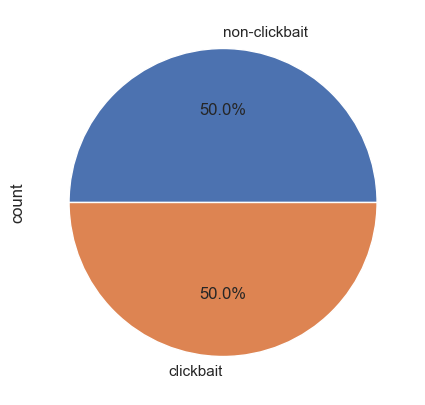

In [51]:
plt.figure(figsize=(5, 5))
sns.set_theme()
df['label'].value_counts().plot.pie(autopct='%1.1f%%')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        17420 non-null  object
 1   label        17420 non-null  object
 2   label_score  17420 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 408.4+ KB


In [53]:
df.isnull().sum()

title          0
label          0
label_score    0
dtype: int64

In [54]:
from nltk.tokenize import word_tokenize
# tf idf
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StemmerFactory()
stopword_factory = StopWordRemoverFactory()
stopword_indonesia = stopword_factory.get_stop_words()
stemmer = factory.create_stemmer()

In [55]:
def preprocess_text(text):
    # remove non-alphabet characters except exclamations and question marks and keep numbers
    text = re.sub(r'[^A-Za-z0-9?!]', ' ', text)
    # remove whitespace
    text = text.strip()
    # remove newline
    text = text.replace('\n', ' ')
    # remove extra space
    text = re.sub(' +', ' ', text)
    # lowercase
    text = text.lower()
    # tokenize
    text = word_tokenize(text)
    result = text;
    return result

In [56]:
df['preprocessed_text'] = df['title'].apply(preprocess_text)
df['stemmed_text'] = df['preprocessed_text'].apply(lambda x: [stemmer.stem(word) for word in x]);

In [57]:
# calculate how many empty word in all stemmed accross all data
empty_word = 0
for i in range(len(df)):
    empty_word += df['stemmed_text'].iloc[i].count('')
print(empty_word)


1346


In [58]:
# remove empty word
df['stemmed_text'] = df['stemmed_text'].apply(lambda x: [word for word in x if word != ''])

In [59]:
df['stopword_removed'] = df['stemmed_text'].apply(lambda x: [word for word in x if word not in stopword_indonesia])
# remove number in stopword removed
df['stopword_removed'] = df['stopword_removed'].apply(lambda x: [word for word in x if not word.isnumeric()])

In [60]:
df.head()

,title,label,label_score,preprocessed_text,stemmed_text,stopword_removed
0,Kapolda Papua Sebut Rusuh Di Wamena Akibat Ber...,non-clickbait,0,"[kapolda, papua, sebut, rusuh, di, wamena, aki...","[kapolda, papua, sebut, rusuh, di, wamena, aki...","[kapolda, papua, rusuh, wamena, akibat, berita..."
1,"Masih Belia, Wajah Ganteng Limbad di Foto Lawa...",clickbait,1,"[masih, belia, wajah, ganteng, limbad, di, fot...","[masih, belia, wajah, ganteng, limbad, di, fot...","[belia, wajah, ganteng, limbad, foto, lawas, s..."
2,Ganjil-Genap Dinilai Belum Berdampak ke Penump...,non-clickbait,0,"[ganjil, genap, dinilai, belum, berdampak, ke,...","[ganjil, genap, nilai, belum, dampak, ke, tump...","[ganjil, genap, nilai, dampak, tumpang, mrt]"
3,HNW: Generasi Muda Jangan Apatis Dalam Membang...,non-clickbait,0,"[hnw, generasi, muda, jangan, apatis, dalam, m...","[hnw, generasi, muda, jangan, apatis, dalam, b...","[hnw, generasi, muda, apatis, bangun, bangsa]"
4,3 Pilihan Pembersih Wajah Esensial Berdasarkan...,clickbait,1,"[3, pilihan, pembersih, wajah, esensial, berda...","[3, pilih, bersih, wajah, esensial, dasar, man...","[pilih, bersih, wajah, esensial, dasar, manfaa..."


In [61]:
# generate unigram frequency for each class
df_clickbait = df[df['label'] == 'clickbait']
df_non_clickbait = df[df['label'] == 'non-clickbait']

words_clickbait = df_clickbait['stopword_removed'].explode().value_counts()
words_non_clickbait = df_non_clickbait['stopword_removed'].explode().value_counts()

In [62]:
# print top 10 words in clickbait
print(words_clickbait.head(20))

stopword_removed
habibie      411
indonesia    395
anak         352
bj           342
kpk          341
bikin        308
foto         260
gara         256
jokowi       248
tahun        245
video        241
alas         239
polisi       215
viral        195
tinggal      183
dpr          179
rumah        164
zodiak       163
fakta        160
cinta        157
Name: count, dtype: int64


In [63]:
print(words_non_clickbait.head(20))

stopword_removed
kpk          597
indonesia    475
habibie      444
jokowi       281
dpr          277
vs           275
polisi       271
uu           260
bj           251
revisi       233
anak         217
asap         214
mahasiswa    213
demo         205
bakar        195
kota         184
papua        182
sinopsis     179
liga         177
jalan        173
Name: count, dtype: int64


In [64]:
angka = ['nol', 'satu', 'dua', 'tiga', 'empat', 'lima', 'enam', 'tujuh', 'delapan', 'sembilan']
potential_clickbait_words = ['bikin', 'viral', 'gara', 'fakta', 'kejut']

def check_features(text):
    result = []
    # check if the text contains exclamation mark
    result.append(1 if '!' in text else 2)
    # check if the text contains question mark
    result.append(3 if '?' in text else 4)
    # check if the text contains multiple exclamation marks
    result.append(5 if '!!' in text else 6)
    # check if the text contains digit
    result.append(7 if any(char.isdigit() for char in text) else 8)
    # check if the text contains numbers
    result.append(9 if any(word.lower() in angka for word in text.split()) else 10)
    # check if the text contains potential clickbait words
    result.append(11 if any(word.lower() in potential_clickbait_words for word in text.split()) else 12)
    return result

df['features'] = df['title'].apply(check_features)
# move the features to the fourth column
df = df[['title', 'label', 'label_score', 'features', 'preprocessed_text', 'stemmed_text']]

In [65]:
df.head(10)

,title,label,label_score,features,preprocessed_text,stemmed_text
0,Kapolda Papua Sebut Rusuh Di Wamena Akibat Ber...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[kapolda, papua, sebut, rusuh, di, wamena, aki...","[kapolda, papua, sebut, rusuh, di, wamena, aki..."
1,"Masih Belia, Wajah Ganteng Limbad di Foto Lawa...",clickbait,1,"[2, 4, 6, 8, 10, 12]","[masih, belia, wajah, ganteng, limbad, di, fot...","[masih, belia, wajah, ganteng, limbad, di, fot..."
2,Ganjil-Genap Dinilai Belum Berdampak ke Penump...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[ganjil, genap, dinilai, belum, berdampak, ke,...","[ganjil, genap, nilai, belum, dampak, ke, tump..."
3,HNW: Generasi Muda Jangan Apatis Dalam Membang...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[hnw, generasi, muda, jangan, apatis, dalam, m...","[hnw, generasi, muda, jangan, apatis, dalam, b..."
4,3 Pilihan Pembersih Wajah Esensial Berdasarkan...,clickbait,1,"[2, 4, 6, 7, 10, 12]","[3, pilihan, pembersih, wajah, esensial, berda...","[3, pilih, bersih, wajah, esensial, dasar, man..."
5,Menteri PANRB Dorong Universitas Cetak Lulusan...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[menteri, panrb, dorong, universitas, cetak, l...","[menteri, panrb, dorong, universitas, cetak, l..."
6,Daniel James Masih Takjub Jalani Debut Bersama MU,clickbait,1,"[2, 4, 6, 8, 10, 12]","[daniel, james, masih, takjub, jalani, debut, ...","[daniel, james, masih, takjub, jalan, debut, s..."
7,8 Seleb Indonesia Ini Disebut Hamil Duluan Saa...,clickbait,1,"[2, 4, 6, 7, 10, 12]","[8, seleb, indonesia, ini, disebut, hamil, dul...","[8, seleb, indonesia, ini, sebut, hamil, dulua..."
8,"Pesta 9.9, Shopee Klaim Transaksi Naik 3 Kali ...",clickbait,1,"[2, 3, 6, 7, 10, 12]","[pesta, 9, 9, shopee, klaim, transaksi, naik, ...","[pesta, 9, 9, shopee, klaim, transaksi, naik, ..."
9,5 Ambulans yang Diamankan Polisi Milik Pemprov...,non-clickbait,0,"[2, 4, 6, 7, 10, 12]","[5, ambulans, yang, diamankan, polisi, milik, ...","[5, ambulans, yang, aman, polisi, milik, pempr..."


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17420 entries, 0 to 17419
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              17420 non-null  object
 1   label              17420 non-null  object
 2   label_score        17420 non-null  int64 
 3   features           17420 non-null  object
 4   preprocessed_text  17420 non-null  object
 5   stemmed_text       17420 non-null  object
dtypes: int64(1), object(5)
memory usage: 816.7+ KB


In [67]:
vocab = {}
for text in df['stemmed_text']:
    for word in text:
        if word not in vocab:
            # Initialize frequency to 1 if the word is encountered for the first time
            vocab[word] = {'index': len(vocab) + 1000, 'frequency': 1}
        else:
            # Increment frequency if the word is already in the vocab
            vocab[word]['frequency'] += 1

# Calculate the total number of unique words in the vocabulary
len(vocab)


12703

In [68]:
# Printing the first 10 rows of the vocab dictionary
count = 0
for word, properties in vocab.items():
    print(f"Word: {word}, Index: {properties['index']}, Frequency: {properties['frequency']}")
    count += 1
    if count >= 10:
        break


Word: kapolda, Index: 1000, Frequency: 30
Word: papua, Index: 1001, Frequency: 301
Word: sebut, Index: 1002, Frequency: 400
Word: rusuh, Index: 1003, Frequency: 96
Word: di, Index: 1004, Frequency: 4366
Word: wamena, Index: 1005, Frequency: 43
Word: akibat, Index: 1006, Frequency: 90
Word: berita, Index: 1007, Frequency: 22
Word: hoaks, Index: 1008, Frequency: 37
Word: medsos, Index: 1009, Frequency: 41


In [69]:
# Sort the vocab dictionary based on frequency in descending order
sorted_vocab = sorted(vocab.items(), key=lambda x: x[1]['frequency'], reverse=True)

# Reassign indices based on frequency, starting from 1000
new_index = 1000
for word, properties in sorted_vocab:
    properties['index'] = new_index
    new_index += 1

# Print the first 10 rows of the updated vocab dictionary
count = 0
for word, properties in sorted_vocab[:10]:
    print(f"Word: {word}, Index: {properties['index']}, Frequency: {properties['frequency']}")
    count += 1


Word: di, Index: 1000, Frequency: 4366
Word: ini, Index: 1001, Frequency: 1906
Word: dan, Index: 1002, Frequency: 1719
Word: yang, Index: 1003, Frequency: 1403
Word: jadi, Index: 1004, Frequency: 1038
Word: kpk, Index: 1005, Frequency: 938
Word: ke, Index: 1006, Frequency: 894
Word: tak, Index: 1007, Frequency: 871
Word: indonesia, Index: 1008, Frequency: 870
Word: habibie, Index: 1009, Frequency: 855


In [70]:
df['vectorized'] = df['stemmed_text'].apply(lambda x: [vocab[word]['index'] for word in x])
df.head()

,title,label,label_score,features,preprocessed_text,stemmed_text,vectorized
0,Kapolda Papua Sebut Rusuh Di Wamena Akibat Ber...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[kapolda, papua, sebut, rusuh, di, wamena, aki...","[kapolda, papua, sebut, rusuh, di, wamena, aki...","[2145, 1049, 1030, 1304, 1000, 1809, 1337, 248..."
1,"Masih Belia, Wajah Ganteng Limbad di Foto Lawa...",clickbait,1,"[2, 4, 6, 8, 10, 12]","[masih, belia, wajah, ganteng, limbad, di, fot...","[masih, belia, wajah, ganteng, limbad, di, fot...","[1092, 4764, 1243, 1886, 5718, 1000, 1052, 324..."
2,Ganjil-Genap Dinilai Belum Berdampak ke Penump...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[ganjil, genap, dinilai, belum, berdampak, ke,...","[ganjil, genap, nilai, belum, dampak, ke, tump...","[1265, 1262, 1193, 1060, 1417, 1006, 1526, 3543]"
3,HNW: Generasi Muda Jangan Apatis Dalam Membang...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[hnw, generasi, muda, jangan, apatis, dalam, m...","[hnw, generasi, muda, jangan, apatis, dalam, b...","[3910, 2050, 1279, 1215, 7657, 1046, 1111, 1810]"
4,3 Pilihan Pembersih Wajah Esensial Berdasarkan...,clickbait,1,"[2, 4, 6, 7, 10, 12]","[3, pilihan, pembersih, wajah, esensial, berda...","[3, pilih, bersih, wajah, esensial, dasar, man...","[1028, 1136, 1933, 1243, 9501, 2546, 1283, 100..."


In [71]:
# get max length of text
max_length = df['vectorized'].apply(len).max()
print(max_length)

20


In [72]:
# padding
padding = 27
df['padded'] = df['vectorized'].apply(lambda x: x + [-1] * (padding - len(x)))
df.head()

,title,label,label_score,features,preprocessed_text,stemmed_text,vectorized,padded
0,Kapolda Papua Sebut Rusuh Di Wamena Akibat Ber...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[kapolda, papua, sebut, rusuh, di, wamena, aki...","[kapolda, papua, sebut, rusuh, di, wamena, aki...","[2145, 1049, 1030, 1304, 1000, 1809, 1337, 248...","[2145, 1049, 1030, 1304, 1000, 1809, 1337, 248..."
1,"Masih Belia, Wajah Ganteng Limbad di Foto Lawa...",clickbait,1,"[2, 4, 6, 8, 10, 12]","[masih, belia, wajah, ganteng, limbad, di, fot...","[masih, belia, wajah, ganteng, limbad, di, fot...","[1092, 4764, 1243, 1886, 5718, 1000, 1052, 324...","[1092, 4764, 1243, 1886, 5718, 1000, 1052, 324..."
2,Ganjil-Genap Dinilai Belum Berdampak ke Penump...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[ganjil, genap, dinilai, belum, berdampak, ke,...","[ganjil, genap, nilai, belum, dampak, ke, tump...","[1265, 1262, 1193, 1060, 1417, 1006, 1526, 3543]","[1265, 1262, 1193, 1060, 1417, 1006, 1526, 354..."
3,HNW: Generasi Muda Jangan Apatis Dalam Membang...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[hnw, generasi, muda, jangan, apatis, dalam, m...","[hnw, generasi, muda, jangan, apatis, dalam, b...","[3910, 2050, 1279, 1215, 7657, 1046, 1111, 1810]","[3910, 2050, 1279, 1215, 7657, 1046, 1111, 181..."
4,3 Pilihan Pembersih Wajah Esensial Berdasarkan...,clickbait,1,"[2, 4, 6, 7, 10, 12]","[3, pilihan, pembersih, wajah, esensial, berda...","[3, pilih, bersih, wajah, esensial, dasar, man...","[1028, 1136, 1933, 1243, 9501, 2546, 1283, 100...","[1028, 1136, 1933, 1243, 9501, 2546, 1283, 100..."


In [73]:
# add features to the first index of the padded text
df['padded'] = df.apply(lambda x: x['features'] + x['padded'], axis=1)
df.head()

,title,label,label_score,features,preprocessed_text,stemmed_text,vectorized,padded
0,Kapolda Papua Sebut Rusuh Di Wamena Akibat Ber...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[kapolda, papua, sebut, rusuh, di, wamena, aki...","[kapolda, papua, sebut, rusuh, di, wamena, aki...","[2145, 1049, 1030, 1304, 1000, 1809, 1337, 248...","[2, 4, 6, 8, 10, 12, 2145, 1049, 1030, 1304, 1..."
1,"Masih Belia, Wajah Ganteng Limbad di Foto Lawa...",clickbait,1,"[2, 4, 6, 8, 10, 12]","[masih, belia, wajah, ganteng, limbad, di, fot...","[masih, belia, wajah, ganteng, limbad, di, fot...","[1092, 4764, 1243, 1886, 5718, 1000, 1052, 324...","[2, 4, 6, 8, 10, 12, 1092, 4764, 1243, 1886, 5..."
2,Ganjil-Genap Dinilai Belum Berdampak ke Penump...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[ganjil, genap, dinilai, belum, berdampak, ke,...","[ganjil, genap, nilai, belum, dampak, ke, tump...","[1265, 1262, 1193, 1060, 1417, 1006, 1526, 3543]","[2, 4, 6, 8, 10, 12, 1265, 1262, 1193, 1060, 1..."
3,HNW: Generasi Muda Jangan Apatis Dalam Membang...,non-clickbait,0,"[2, 4, 6, 8, 10, 12]","[hnw, generasi, muda, jangan, apatis, dalam, m...","[hnw, generasi, muda, jangan, apatis, dalam, b...","[3910, 2050, 1279, 1215, 7657, 1046, 1111, 1810]","[2, 4, 6, 8, 10, 12, 3910, 2050, 1279, 1215, 7..."
4,3 Pilihan Pembersih Wajah Esensial Berdasarkan...,clickbait,1,"[2, 4, 6, 7, 10, 12]","[3, pilihan, pembersih, wajah, esensial, berda...","[3, pilih, bersih, wajah, esensial, dasar, man...","[1028, 1136, 1933, 1243, 9501, 2546, 1283, 100...","[2, 4, 6, 7, 10, 12, 1028, 1136, 1933, 1243, 9..."


In [74]:
# make sure all padded text has the same length
df['padded'].apply(len).value_counts()

padded
33    17420
Name: count, dtype: int64

In [75]:
# convert padded text to numpy array
X = df['padded'].to_numpy()
y = df['label_score']
X = X.tolist()

In [76]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1453)

In [77]:
from sklearn.ensemble._gb import GradientBoostingClassifier

model = GradientBoostingClassifier(max_depth=15, n_estimators=100, random_state=3006, max_features='sqrt')

In [78]:
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=15, max_features='sqrt', random_state=3006)

In [79]:
y_pred = model.predict(X_test)

In [80]:
print(y_pred[:10])

[1 1 0 1 1 1 0 0 0 0]


In [81]:
from sklearn.metrics import classification_report, accuracy_score

# evaluate
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1756
           1       0.87      0.85      0.86      1728

    accuracy                           0.86      3484
   macro avg       0.86      0.86      0.86      3484
weighted avg       0.86      0.86      0.86      3484

0.8610792192881745


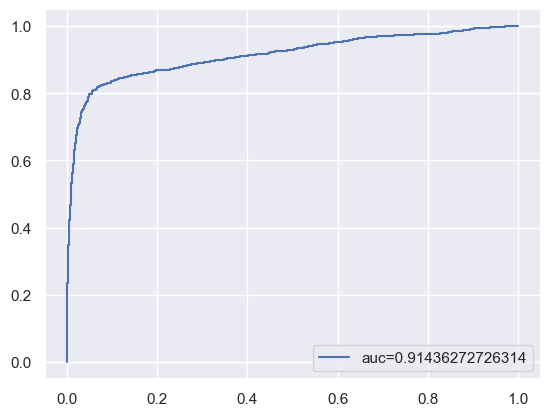

AUC: 0.91436272726314


In [82]:
from sklearn.metrics import roc_curve, auc
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print('AUC:', auc)